In [1]:
# Import Necessary Library
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset
dfSalaries = pd.read_csv('/content/SHAISalaries.csv')
dfSalaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## **Basic Data Exploration**

In [3]:
# Identify the number of rows and columns in the dataset
dfSalaries.shape

(148654, 13)

In [4]:
#determine the data types of each column
dfSalaries.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [5]:
#check for missing values in each column
dfSalaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [6]:
print("unique Value of Id is ",len(dict(dfSalaries['Id'].value_counts())))
print("unique Value of EmployeeName is ",len(dict(dfSalaries['EmployeeName'].value_counts())))
print("unique Value of JobTitle is ",len(dict(dfSalaries['JobTitle'].value_counts())))
print("unique Value of BasePay is ",len(dict(dfSalaries['BasePay'].value_counts())))
print("unique Value of OvertimePay is ",len(dict(dfSalaries['OvertimePay'].value_counts())))
print("unique Value of OtherPay is ",len(dict(dfSalaries['OtherPay'].value_counts())))
print("unique Value of Benefits is ",len(dict(dfSalaries['Benefits'].value_counts())))
print("unique Value of TotalPay is ",len(dict(dfSalaries['TotalPay'].value_counts())))
print("unique Value of TotalPayBenefits is ",len(dict(dfSalaries['TotalPayBenefits'].value_counts())))
print("unique Value of Year is ",len(dict(dfSalaries['Year'].value_counts())))
print("unique Value of Notes is ",len(dict(dfSalaries['Notes'].value_counts())))
print("unique Value of Agency is ",len(dict(dfSalaries['Agency'].value_counts())))
print("unique Value of Status is ",len(dict(dfSalaries['Status'].value_counts())))

unique Value of Id is  148654
unique Value of EmployeeName is  110811
unique Value of JobTitle is  2159
unique Value of BasePay is  109489
unique Value of OvertimePay is  65998
unique Value of OtherPay is  83225
unique Value of Benefits is  98465
unique Value of TotalPay is  138486
unique Value of TotalPayBenefits is  142098
unique Value of Year is  4
unique Value of Notes is  0
unique Value of Agency is  1
unique Value of Status is  0


In [7]:
# you can through over columns and callable .isnull or .isna but to get summary for all columns in pone step just use info
dfSalaries['Benefits'].isnull().value_counts()

False    112491
True      36163
Name: Benefits, dtype: int64

In [8]:
#for report
len(dfSalaries)
len(dfSalaries.columns)
dfSalaries.size

1932502

## **Descriptive Statistics**

In [9]:
# Calculate basic statistics mean, median, mode, minimum, and maximum salary,
# determine the range of salaries,
# and find the standard deviation.


In [10]:
# dfSalaries.describe()
desc= dfSalaries.TotalPay.describe()
desc

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [11]:
dfSalaries.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


## **Data Cleaning**

In [12]:
#detect null values
print(dfSalaries.isnull().sum())
print(dfSalaries.shape)

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64
(148654, 13)


<Axes: >

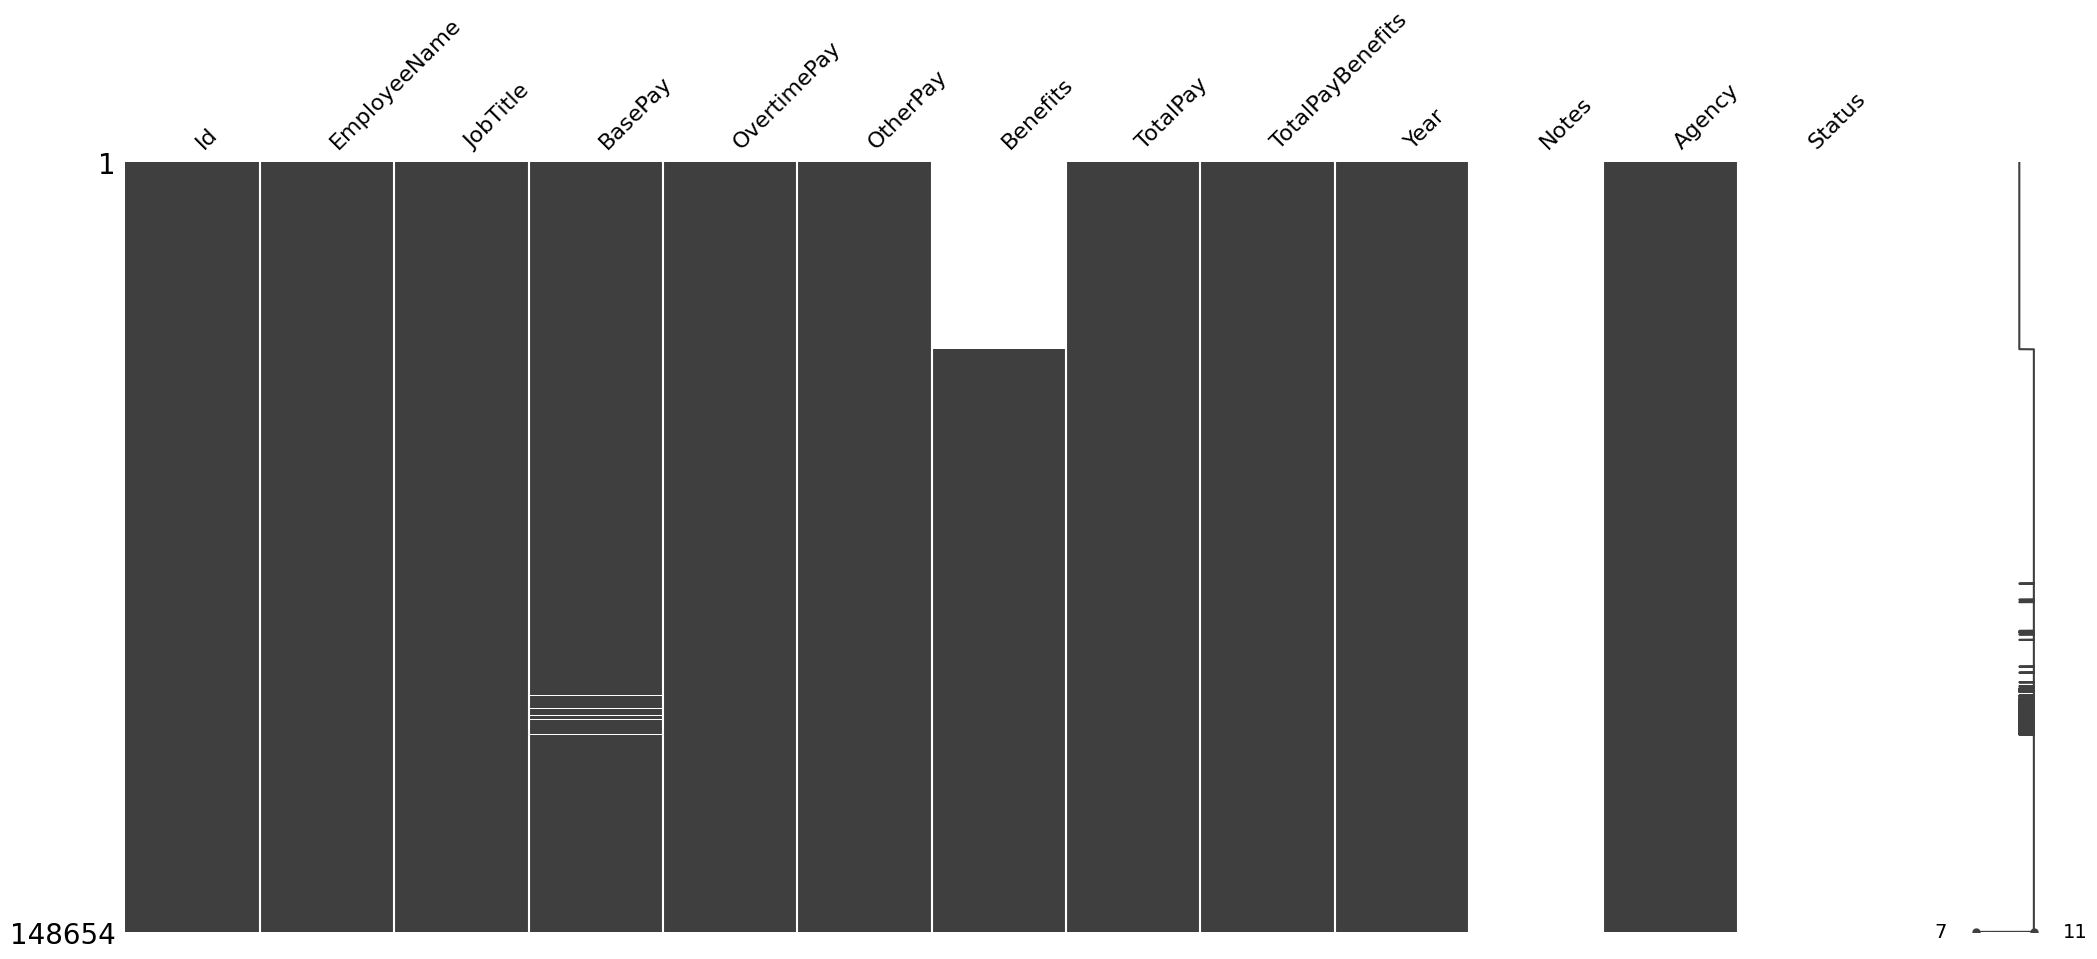

In [13]:
#Through visualization
msno.matrix(dfSalaries)

In [14]:
# BasePay 9
# OvertimePay 4
# otherPay 4
# Benefits 50%

# Notes 100%
# Status 100%

In [15]:
# Delete columns that are completely filled with NAN values
dfSalaries.drop('Notes', axis=1, inplace=True)
dfSalaries.drop('Status', axis=1, inplace=True)

In [16]:
dfSalaries.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [17]:
# Fills columns that are partially filled with NAN values by mean value of the column
dfSalaries['BasePay'] = dfSalaries['BasePay'].replace(np.NaN, dfSalaries['BasePay'].mean())
dfSalaries['OtherPay'] = dfSalaries['OtherPay'].replace(np.NaN, dfSalaries['OtherPay'].mean())
dfSalaries['Benefits'] = dfSalaries['Benefits'].replace(np.NaN, dfSalaries['Benefits'].mean())
dfSalaries['OvertimePay'] = dfSalaries['OvertimePay'].replace(np.NaN, dfSalaries['OvertimePay'].mean())

## **Basic Data Visualization**


In [18]:
# plot pie charts to represent the proportion of employees in different departments.
count = dfSalaries['JobTitle'].value_counts()
display(count)

Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: JobTitle, Length: 2159, dtype: int64

In [19]:
top_ten_dept = count[0:10]

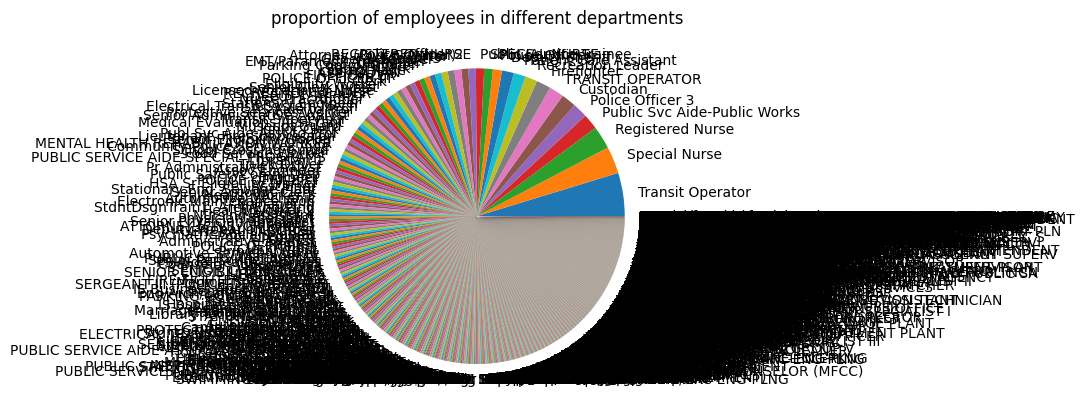

In [20]:
y= dict(count)
plt.pie(y.values(),labels = y.keys())
plt.title("proportion of employees in different departments")
plt.show()

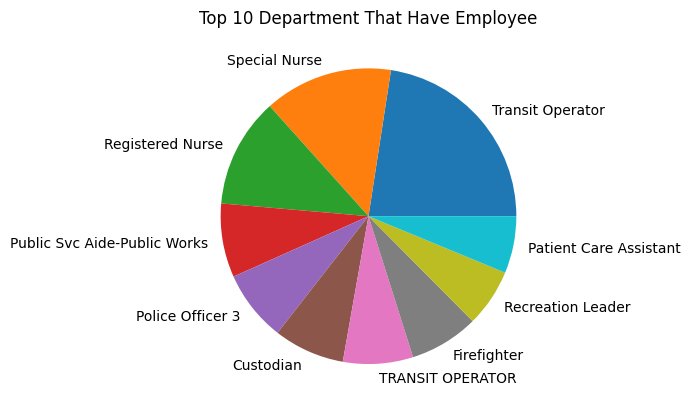

In [21]:
y= dict(top_ten_dept)
plt.pie(y.values(),labels = y.keys())
plt.title("Top 10 Department That Have Employee")
plt.show()

Text(0.5, 1.0, 'Distribution of BasePay')

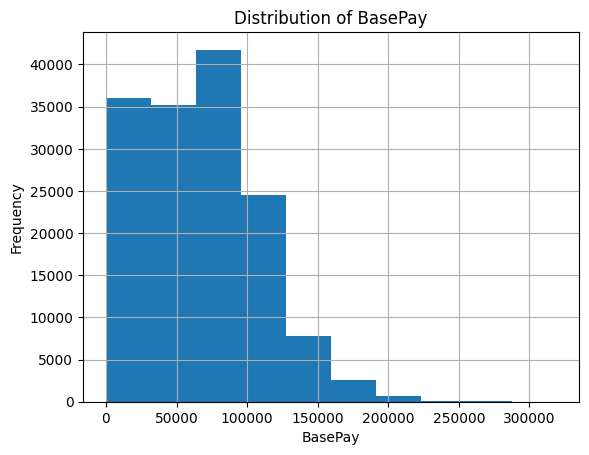

In [22]:
#Create a histograms to visualize the distribution of salaries (BasePay column)
dfSalaries['BasePay'].hist()

# add labels and title
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.title('Distribution of BasePay')

## **Grouped Analysis**

In [23]:
# Group the data by Year columns
gbY = dfSalaries.groupby(['Year'])
firstY = gbY.first()
firstY

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Agency
Year,,,,,,,,,,
2011,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,San Francisco
2012,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.120000,362844.66,407274.78,San Francisco
2013,72926,Gregory P Suhr,Chief of Police,319275.01,0.00,20007.06,86533.210000,339282.07,425815.28,San Francisco
2014,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.040000,471952.64,510732.68,San Francisco


In [24]:
# calculate summary statistics for group
firstY.TotalPay.describe()

count         4.000000
mean     435418.700000
std      105379.725493
min      339282.070000
25%      356954.012500
50%      417398.650000
75%      495863.337500
max      567595.430000
Name: TotalPay, dtype: float64

Text(0.5, 1.0, 'Distribution of BasePay')

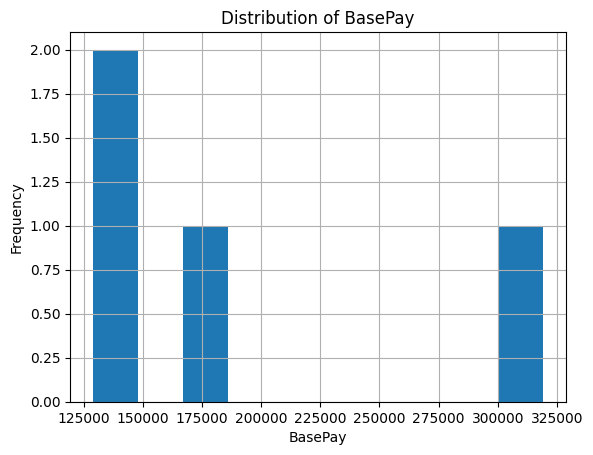

In [25]:
# draw a histogram of the group
firstY['BasePay'].hist()

# add labels and title
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.title('Distribution of BasePay')

In [26]:
gbJ = dfSalaries.groupby(['JobTitle'])
gbJ.first()
firstJ = gbJ.first()

In [27]:
# calculate summary statistics for group
firstJ.TotalPay.describe()

count      2159.000000
mean     105535.306596
std       55287.382189
min           0.000000
25%       71982.145000
50%       94078.010000
75%      126233.580000
max      567595.430000
Name: TotalPay, dtype: float64

Text(0.5, 1.0, 'Distribution of BasePay')

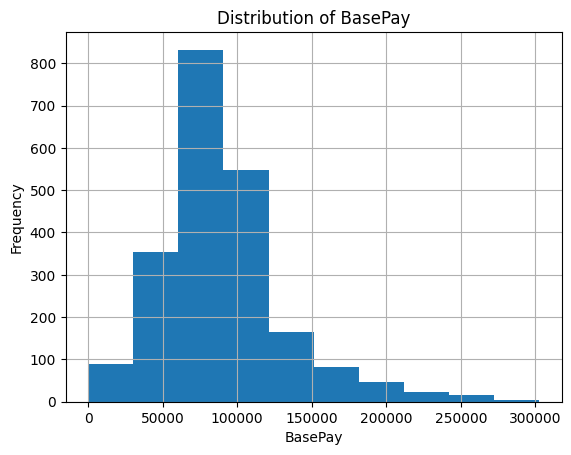

In [28]:
# calculate summary statistics for group,
# draw a histogram of the group
firstJ['BasePay'].hist()

# add labels and title
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.title('Distribution of BasePay')

In [29]:
#for report and compare the average salaries across different groups.

## **Simple Correlation Analysis**

In [30]:
# Identify any correlation between columns in data
dfSalaries.corr()

<ipython-input-30-fe2b2e7255ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfSalaries.corr()


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,1.000000,-0.204628,-0.081502,-0.100399,-0.229712,-0.211478,-0.092190,0.968171
BasePay,-0.204628,1.000000,0.266633,0.283760,0.806665,0.950514,0.942999,0.033737
OvertimePay,-0.081502,0.266633,1.000000,0.316592,0.268539,0.504844,0.467967,0.027886
OtherPay,-0.100399,0.283760,0.316592,1.000000,0.203621,0.470482,0.422328,-0.002499
Benefits,-0.229712,0.806665,0.268539,0.203621,1.000000,0.782687,0.843039,-0.027393
TotalPay,-0.211478,0.950514,0.504844,0.470482,0.782687,1.000000,0.977313,0.032090
TotalPayBenefits,-0.092190,0.942999,0.467967,0.422328,0.843039,0.977313,1.000000,0.151947
Year,0.968171,0.033737,0.027886,-0.002499,-0.027393,0.032090,0.151947,1.000000


In [31]:
#Identify any correlation between salary and another numerical column
dfSalaries.corr()['TotalPay']

<ipython-input-31-7f8595618652>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfSalaries.corr()['TotalPay']


Id                 -0.211478
BasePay             0.950514
OvertimePay         0.504844
OtherPay            0.470482
Benefits            0.782687
TotalPay            1.000000
TotalPayBenefits    0.977313
Year                0.032090
Name: TotalPay, dtype: float64

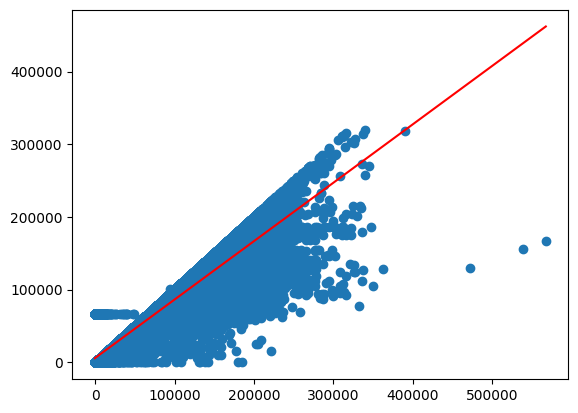

In [32]:
# plot a scatter plot to visualize the relationship.
x = dfSalaries['TotalPay']
y = dfSalaries['BasePay']
# plotting the data
plt.scatter(x, y)

# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

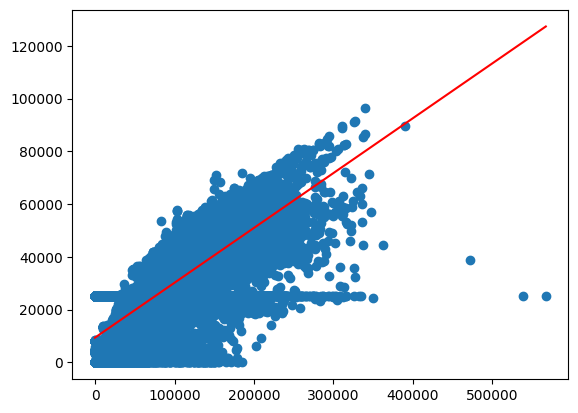

In [33]:
x = dfSalaries['TotalPay']
y = dfSalaries['Benefits']
# plotting the data
plt.scatter(x, y)

# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

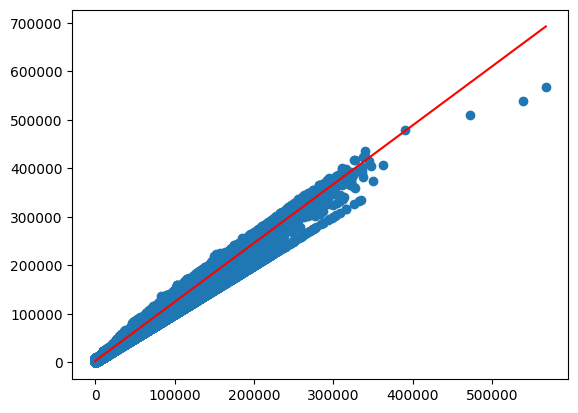

In [34]:
x = dfSalaries['TotalPay']
y = dfSalaries['TotalPayBenefits']
# plotting the data
plt.scatter(x, y)

# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

## ***The END***

---

